(-5.0, 5.0)

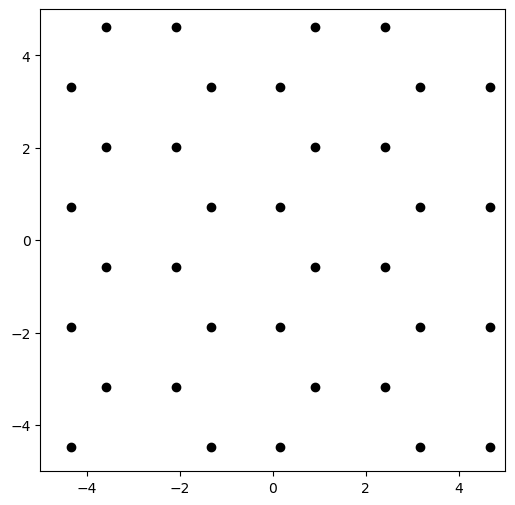

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fname = '../data/graphene_coord.txt'
coords = np.genfromtxt(fname)

plt.figure(figsize=(6,6))
plt.plot(coords[:,0],coords[:,1],'o',color='black')

plt.xlim(-5,5)
plt.ylim(-5,5)



Maximum LJ value:  1.3877040332845527e+31
Minimum LJ value:  -2.7195295051622095
Maximum LJ value:  16124.527441498603
Minimum LJ value:  -2.4640231976110605
Maximum LJ value:  -0.08702795725022196
Minimum LJ value:  -1.7252867761341766
Maximum LJ value:  -0.04329702116203394
Minimum LJ value:  -0.49935025698437285
Maximum LJ value:  -0.02112685028506319
Minimum LJ value:  -0.1411516739553218
Maximum LJ value:  -0.010747162837903175
Minimum LJ value:  -0.05459400106249715


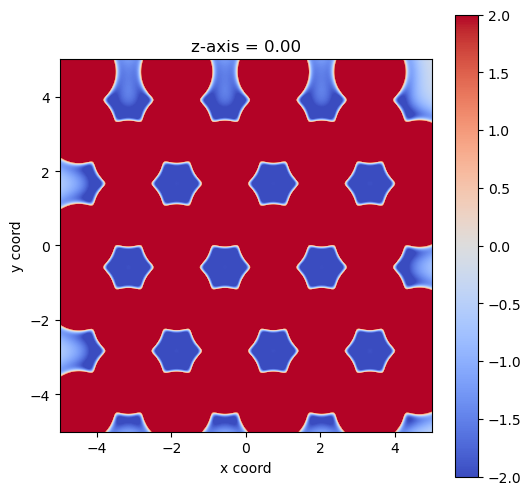

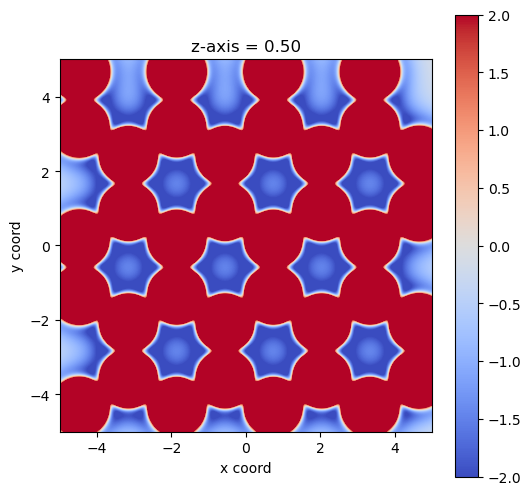

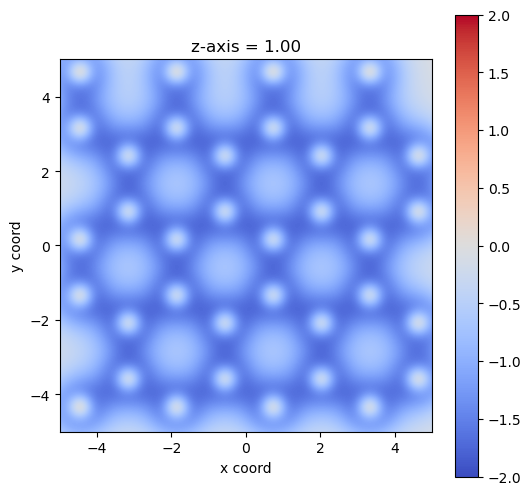

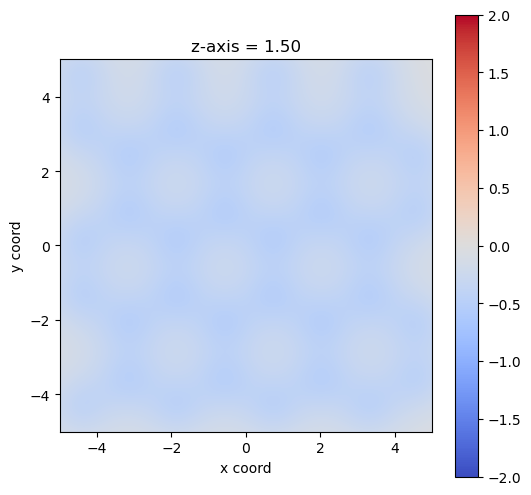

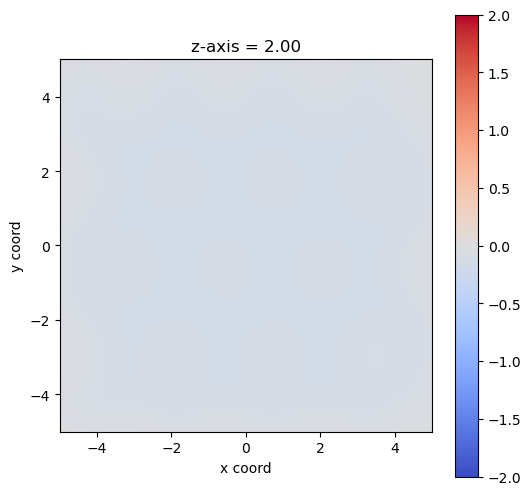

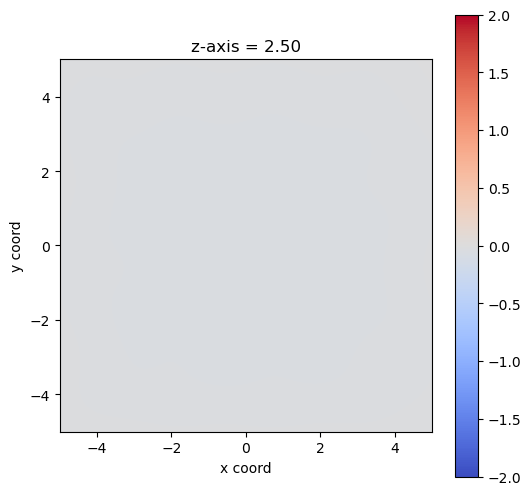

In [15]:
import math

def calDist(v1,v2):
    if len(v1) == 3:
        dist = math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2 + (v2[2]-v1[2])**2)
    elif len(v1) == 2:
        dist = math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2)
    return dist


def LJ(v1, v2, epsilon, sigma):
    r = calDist(v1,v2)
    E = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return E

grid_num = 300
x_grid = np.linspace(-5,5,grid_num)
y_grid = np.linspace(-5,5,grid_num)

z_grid = np.array([0,0.5,1,1.5,2,2.5])

e_LJ = 1.0
s_LJ = 1.0

for num,z in enumerate(z_grid):
    grid_E_LJ = []
    for x in x_grid:
        for y in y_grid:
            grid_coord = [x,y,z]
            E_total = 0
            for c in coords: 
                # iterating all given graphene coordinates b/c there are not so many. 
                # If there are many, you should use r_cut. 
                # Think about how to. 
                E_total += LJ(grid_coord, c, e_LJ, s_LJ)
            grid_E_LJ.append([x,y,E_total])
    
    grid_E_LJ = np.array(grid_E_LJ)
    
    ## Format of grid_E_LJ:
    ## [x1, y1, z1, E1],
    ## [x1, y2, z1, E1],
    ## [x1, y3, z1 E1], ...
    
    grid_E_LJ_matrix = []
    for i in range(grid_num):
        grid_E_LJ_matrix.append(grid_E_LJ[i*grid_num:(i+1)*grid_num][:,2]) 
    grid_E_LJ_matrix = np.array(grid_E_LJ_matrix)
        
    print("Maximum LJ value: ", np.max(grid_E_LJ_matrix))
    print("Minimum LJ value: ", np.min(grid_E_LJ_matrix))

    plt.figure(num=num,figsize=(6,6))
    plt.title("z-axis = %.2f"%(z))
    
    plt.imshow(grid_E_LJ_matrix, interpolation='gaussian',extent=(x_grid[0],x_grid[-1],y_grid[0],y_grid[-1]), origin='lower',
              vmin=-2, vmax=2, cmap='coolwarm')
    
    cbar = plt.colorbar()
    
    plt.ylabel("y coord")
    plt.xlabel("x coord")